In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)


Toggle code

In [2]:
# all modules necessary for this nb
import os
import sys
import pickle

import numpy as np
np.random.seed(0)
import pylab as pl
import scipy.stats as sstats

# setting parameters for default matplotlib plots
%matplotlib inline

In [3]:
pl.style.use('fabiostyle')
# needs to find the library of functions
sys.path.append('../../code/')  # to be replaced!

import utils as ut
import plots as pt

In [4]:
NOTEBOOK_NAME = 'overlaps_d1d2_vhpcAnimals'

In [5]:
from pickleshare import PickleShareDB

autorestore_folder = os.path.join(os.getcwd(), 'autorestore', NOTEBOOK_NAME)
db = PickleShareDB(autorestore_folder)
import sys
from workspace import *
import IPython
ip = IPython.get_ipython()

# this will restore all the saved variables. ignore the errors listed.
load_workspace(ip, db)

# use `save_worspace(db)` to save variables at the end

Unable to restore variable 'calc_shuffle_overlap', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'plot_hist', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'plot_it', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)
Unable to restore variable 'sigtest', ignoring (use %store -d to forget!)
('The error was:', <type 'exceptions.KeyError'>)


In [6]:
#from itertools import product
#def load_all_animals_vars(varname, animal_list, pilot_list=None, notebook='preprocessing'):
#    all_of_them = {}
#    for ani in animal_list:
#        folder = '../autorestore/%s/' % (notebook)
#        all_of_them.update({ani: ut.load_variable(varname, folder)})
#    return all_of_them

In [7]:
# load data
#if one combination fails, it'll stop loading any further data from other animals for that specific combination
from itertools import product

blast_animals = 'c10m6','c3m3', '90', '91', '93', '93b',# '64', '991', '52',

all_animals = 'c10m6','c3m3', '90', '91', '93', '93b', '64', '991', '52', #, 'NEW_57_1day',
#'NEW_58', 'NEW_991b', 'NEW_dHPC6_1day', 'NEW_dHPC7b_1day', 'dHPC20', 'dHPC4', 'dHPC7,'
#vHPC_animals = 'c10m6', '90', '91', '93', '93b', 'c3m3', '52', '64', '991',# 'NEW_57_1day',
#'NEW_58', 'NEW_991b'
#dHPC_animals = 'NEW_dHPC6_1day', 'NEW_dHPC7b_1day', 'dHPC20', 'dHPC4', 'dHPC7,'

animals = blast_animals
prod = product(['d1', 'd2'], ['blasts'], ['all', ''],  ['_up','_dn',''])
for a, b, c, d in prod:
    try:
        what = np.concatenate([ut.load_variable('cells_%s%s_%s%s'%(c, a, b, d), '../%s/notebooks/autorestore/tuning_stability_values/'%ani)
                               for ani in animals])
        exec('cells_%s%s_%s%s = what'%(c, a, b, d))
    except IOError:
        print("Skip", ani, a, b, c, d)

animals = all_animals
prod = product(['d1', 'd2'], ['rew', 'sho', 'coyote', 'female', 'rew_v_odors', 'sho_v_odors',
                             'fem_v_SS', 'coyote_v_SS'], ['all', ''],  ['_up','_dn',''])
for a, b, c, d in prod:
    try:
        what = np.concatenate([ut.load_variable('cells_%s%s_%s%s'%(c, a, b, d), '../%s/notebooks/autorestore/tuning_stability_values/'%ani)
                               for ani in animals])
        exec('cells_%s%s_%s%s = what'%(c, a, b, d))
    except IOError:
        print("Skip", ani, a, b, c, d)

('Skip', 'c10m6', 'd1', 'rew_v_odors', 'all', '_up')
('Skip', 'c10m6', 'd1', 'rew_v_odors', 'all', '_dn')
('Skip', 'c10m6', 'd1', 'rew_v_odors', 'all', '')
('Skip', 'c10m6', 'd1', 'sho_v_odors', 'all', '_up')
('Skip', 'c10m6', 'd1', 'sho_v_odors', 'all', '_dn')
('Skip', 'c10m6', 'd1', 'sho_v_odors', 'all', '')
('Skip', 'c10m6', 'd1', 'fem_v_SS', 'all', '_up')
('Skip', 'c10m6', 'd1', 'fem_v_SS', 'all', '_dn')
('Skip', 'c10m6', 'd1', 'fem_v_SS', 'all', '')
('Skip', 'c10m6', 'd1', 'coyote_v_SS', 'all', '_up')
('Skip', 'c10m6', 'd1', 'coyote_v_SS', 'all', '_dn')
('Skip', 'c10m6', 'd1', 'coyote_v_SS', 'all', '')
('Skip', 'c10m6', 'd2', 'rew_v_odors', 'all', '_up')
('Skip', 'c10m6', 'd2', 'rew_v_odors', 'all', '_dn')
('Skip', 'c10m6', 'd2', 'rew_v_odors', 'all', '')
('Skip', 'c10m6', 'd2', 'sho_v_odors', 'all', '_up')
('Skip', 'c10m6', 'd2', 'sho_v_odors', 'all', '_dn')
('Skip', 'c10m6', 'd2', 'sho_v_odors', 'all', '')
('Skip', 'c10m6', 'd2', 'fem_v_SS', 'all', '_up')
('Skip', 'c10m6', 'd2',

In [8]:
len(cells_d1_blasts)

306

In [9]:
N = 50
n_loops = 5000

def calc_shuffle_overlap(pop1, pop2, n_loops=n_loops, N=N):
     return [(np.random.choice([0, 1], size=N, p=(1-pop1.mean(), pop1.mean()))*
                  np.random.choice([0, 1], size=N, p=(1-pop2.mean(), pop2.mean()))).mean() for r in range(n_loops)]



In [10]:
def sigtest(values, x):
    return [None, 1 - sstats.norm(np.mean(values), np.std(values)).cdf(x)]
def plot_hist(ax, vals, colors=['0.7', 'k'], bins=np.linspace(0, 0.3, 30), ids=[0, 1]):
    # ax.hist(vals2_all[0], bins=10, histtype='step', color='0.7')
    y, x = np.histogram(vals[ids[0]], bins=bins, normed=True)
    ax.step(x[:-1], y*np.diff(x)[0], color=colors[0], lw=1, where='post')
    ax.vlines(vals[ids[1]], 0, 0.4, color=colors[1], lw=1, zorder=19)
    y = np.diff(ax.axis()[-2:])*0.95 + ax.axis()[-2]
    pt.add_significance(ax, vals[ids[0]], vals[ids[1]], vals[ids[1]], vals[ids[1]], 0.5, sig_func=sigtest)
    pt.nicer_plot(ax)

In [11]:
#trying to extract p-value of comparison...

#tester = sstats.norm(np.mean([est, (pop1*pop2).mean()]), np.std([est, (pop1*pop2).mean()])).cdf()
#print tester

In [12]:
def plot_it(pop1, pop2, untuned, est, labels=['d1', 'd2', 'd1+d2', 'Untuned'], title="Sucrose",
            colors=['aqua', 'turquoise', 'darkcyan', (0.8, 0.8, 0.8)],
            hist_colors=[(1, 0.7, 0.7), 'r'], bins=np.linspace(0, 0.3, 30)):
    fig, axs = pl.subplots(1, 2, figsize=(3, 1))

    ax = axs[0]
    plot_hist(ax, [est, (pop1*pop2).mean()], bins=bins,
            colors=hist_colors)

    ax.set_xlabel('Co-tuned Cells Ratio')
    ax.set_ylabel('PDF')

    ax.set_xlim(0, 0.3)
    ax.set_ylim(0, 0.5)

    ax = axs[1]
    
    t = map(sum, [pop1*~pop2, pop2*~pop1, pop1*pop2, untuned])
    total = np.sum(t)
    _, txts, _ = ax.pie(t, colors=colors, explode=[0.05]*len(t),
                        autopct=lambda x: "%.1f%%"%(x),
                        labels=labels,
                        textprops={'fontsize':3})
    for tt in txts:
        tt.set_fontsize(5)
    ax.text(1, -1.3, 'n = %d'%total, fontsize=3)

    ax.set_aspect('equal')
    fig.suptitle(title)
    
    return fig, axs

In [13]:
#set colors for figures
r1='lightskyblue'
r2='lightblue'
r12='royalblue'
s1='lightcoral'
s2='r'
s12='crimson'
c1='burlywood'
c2='peru'
c12='sienna'
f1='palegoldenrod'
f2='khaki'
f12='goldenrod'
b1='lightgreen'
b2='greenyellow'
b12='olivedrab'
g='lightgrey'

In [14]:
#initialize dictionary for chance vs observed overlap comparison
#entries will be mean chance overlap, observed overlap, observed-chance, (observed-chance)/chance
diff_from_chance = {}

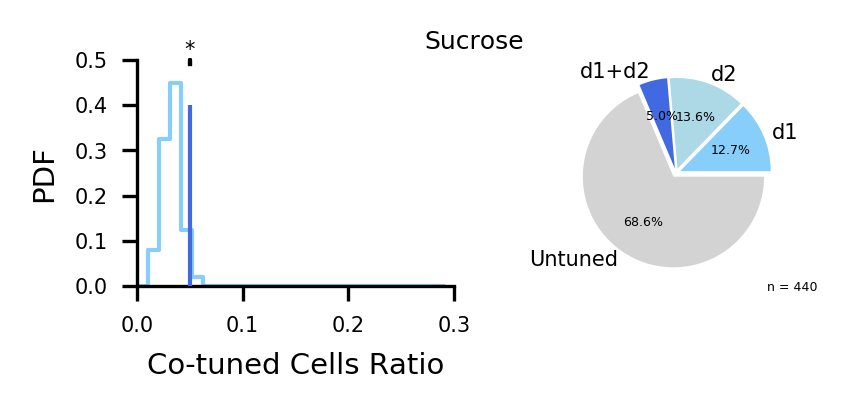

In [15]:
comparison = '_suc_d1_v_d2'
try:
    pop1 = cells_d1_rew
    pop2 = cells_d2_rew
    unt = ~(cells_d1_rew + cells_d2_rew)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    fig, axs = plot_it(pop1, pop2, unt, est,colors=[r1,r2,r12,g], hist_colors=[r1,r12])
    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'failed'

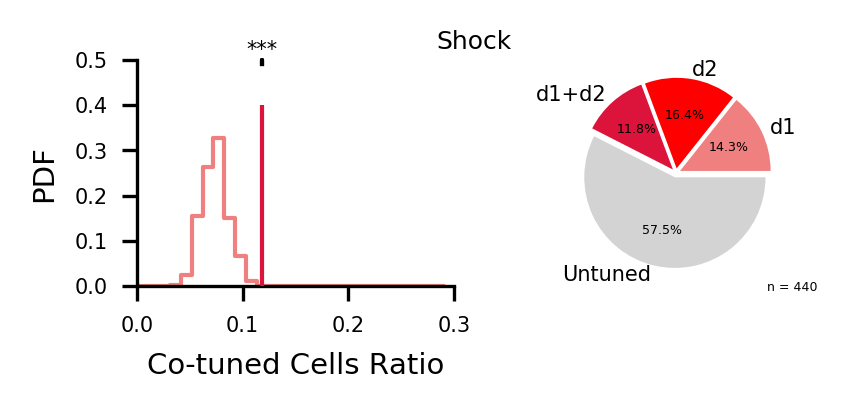

In [16]:
comparison = '_shock_d1_v_d2'
try:
    pop1 = cells_d1_sho
    pop2 = cells_d2_sho
    unt = ~(cells_d1_sho + cells_d2_sho)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='Shock', colors=[s1,'r',s12,g], hist_colors=[s1,s12])
    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

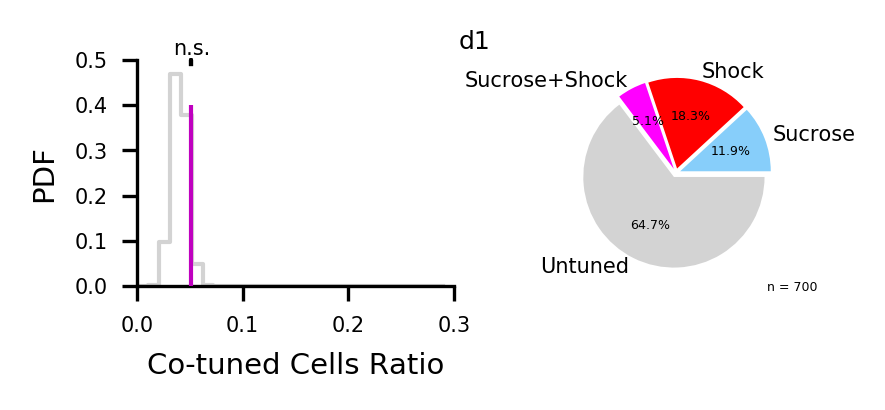

In [17]:
#using all cells here, since no need cellReg necessary (data are all from same session)
comparison = 'suc_v_shock_d1'
try:
    pop1 = cells_alld1_rew
    pop2 = cells_alld1_sho
    unt = ~(cells_alld1_rew+cells_alld1_sho)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d1', labels=['Sucrose', 'Shock', 'Sucrose+Shock', 'Untuned'],
                       colors=[r1,s2,'magenta',g], hist_colors=[g, 'm'])
    
    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

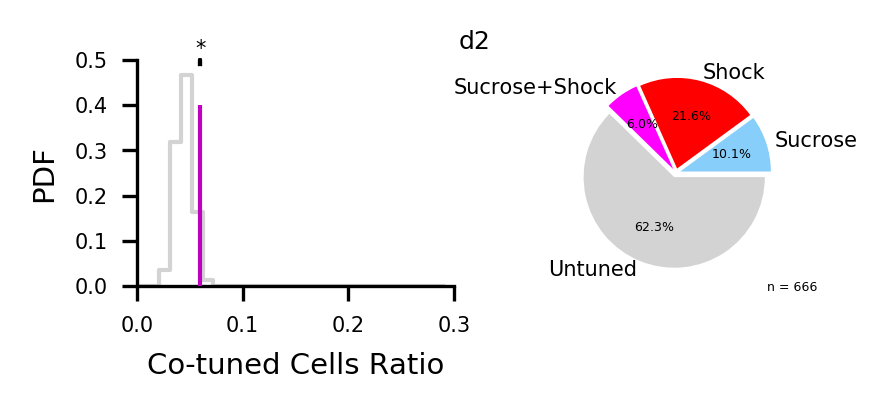

In [18]:
#using all cells here, since no need cellReg necessary (data are all from same session)
comparison = 'suc_v_shock_d2'
try:
    pop1 = cells_alld2_rew
    pop2 = cells_alld2_sho
    unt = ~(cells_alld2_rew + cells_alld2_sho)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d2', labels=['Sucrose', 'Shock', 'Sucrose+Shock', 'Untuned'],
                       colors=[r1,s2,'magenta',g], hist_colors=[g, 'm'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

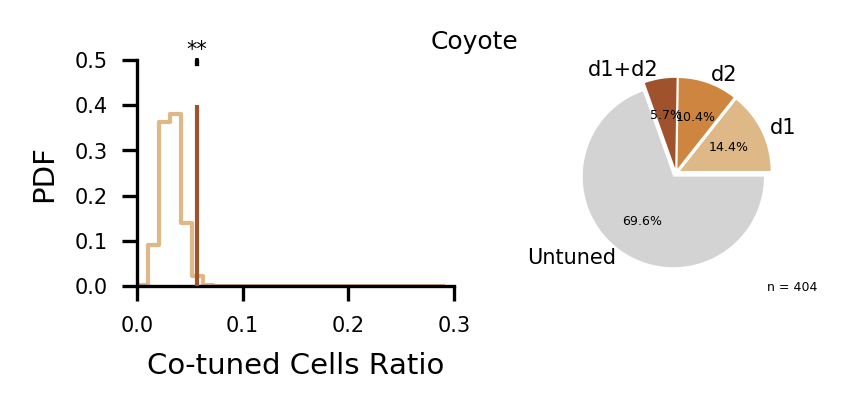

In [19]:
comparison = '_coyote_d1_v_d2'
try:
    pop1 = cells_d1_coyote
    pop2 = cells_d2_coyote
    unt = ~(cells_d1_coyote + cells_d2_coyote)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='Coyote',
                       colors=[c1,c2,c12,g], hist_colors=[c1, c12])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

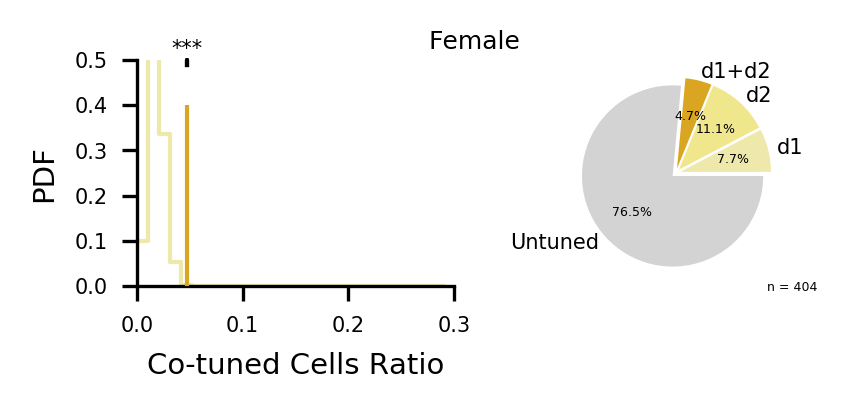

In [20]:
comparison = '_female_d1_v_d2'
try:
    pop1 = cells_d1_female
    pop2 = cells_d2_female
    unt = ~(cells_d1_female + cells_d2_female)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='Female', colors=[f1,f2,f12,g], hist_colors=[f1,f12])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

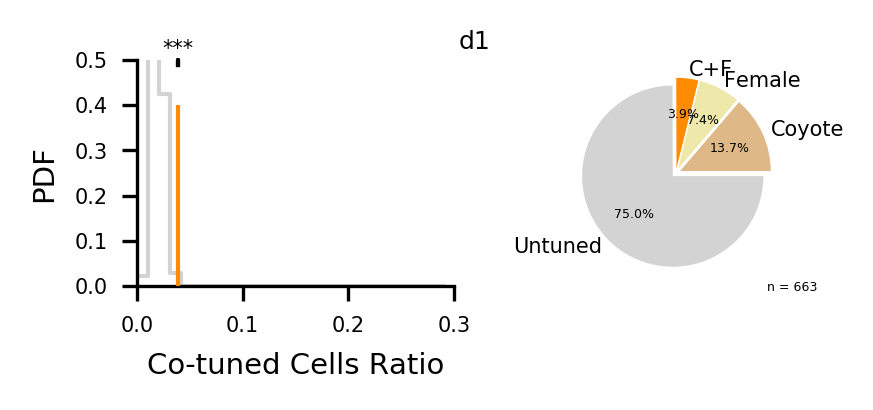

In [21]:
#using all cells here, since no need cellReg necessary (data are all from same session)
comparison = 'coyote_v_female_d1'
try:
    pop1 = cells_alld1_coyote
    pop2 = cells_alld1_female
    unt = ~(cells_alld1_coyote+cells_alld1_female)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d1', labels=['Coyote', 'Female', 'C+F', 'Untuned'],
                       colors=[c1,f1,'darkorange',g], hist_colors=[g,'darkorange'])
   
    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

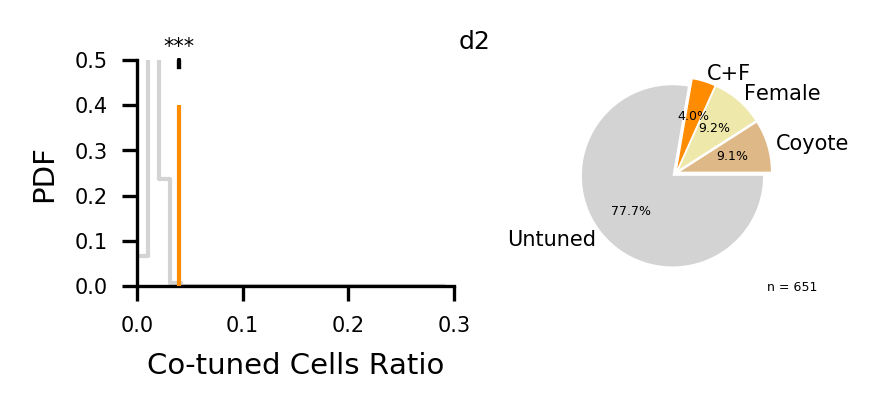

In [22]:
#using all cells here, since no need cellReg necessary (data are all from same session)
comparison = 'coyote_v_female_d2'
try:
    pop1 = cells_alld2_coyote
    pop2 = cells_alld2_female
    unt = ~(cells_alld2_coyote + cells_alld2_female)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d2', labels=['Coyote', 'Female', 'C+F', 'Untuned'],
                      colors=[c1,f1,'darkorange',g],hist_colors=[g,'darkorange'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

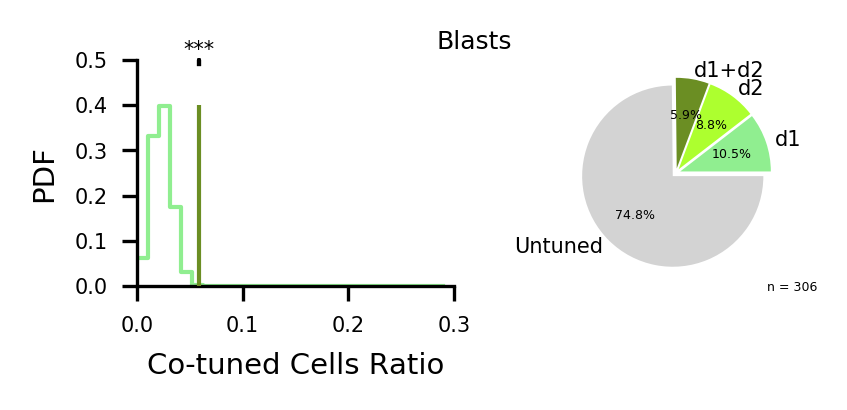

In [23]:
comparison = '_blasts_d1_v_d2'
try:
    pop1 = cells_d1_blasts
    pop2 = cells_d2_blasts
    unt = ~(cells_d1_blasts + cells_d2_blasts)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    fig, axs = plot_it(pop1, pop2, unt, est, title = "Blasts",
                      colors=[b1,b2,b12,g],hist_colors=[b1,b12])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

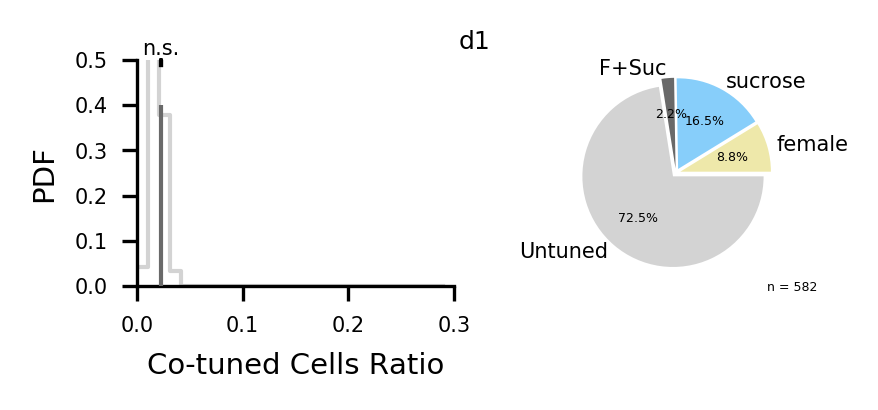

In [24]:
comparison = 'female_v_suc_d1'
try:
    pop1 = cells_d1_fem_v_SS
    pop2 = cells_d1_rew_v_odors
    unt = ~(cells_d1_fem_v_SS+cells_d1_rew_v_odors)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d1', labels=['female', 'sucrose', 'F+Suc', 'Untuned'],
                       colors=[f1,r1,'dimgrey',g],hist_colors=[g,'dimgrey'])
    
    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

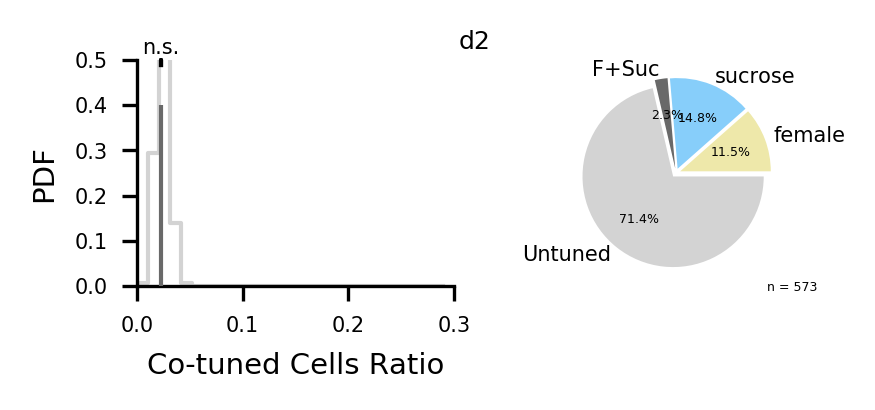

In [25]:
comparison = 'female_v_suc_d2'
try:
    pop1 = cells_d2_fem_v_SS
    pop2 = cells_d2_rew_v_odors
    unt = ~(cells_d2_fem_v_SS+cells_d2_rew_v_odors)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d2', labels=['female', 'sucrose', 'F+Suc', 'Untuned'],
                       colors=[f1,r1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

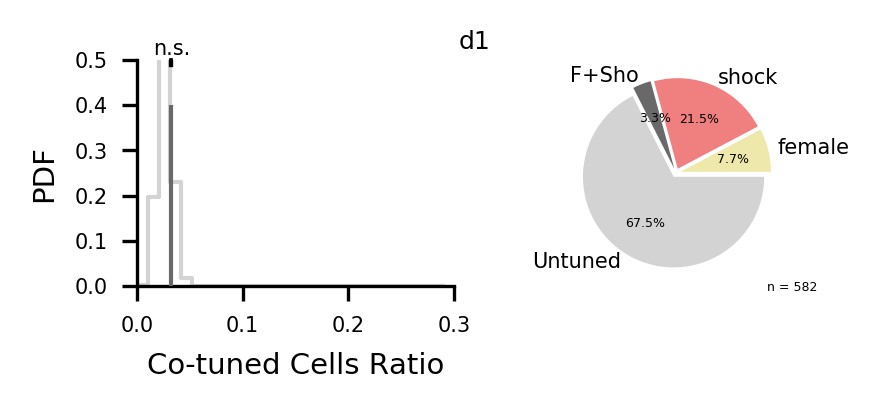

In [26]:
comparison = 'female_V_shock_d1'
try:
    pop1 = cells_d1_fem_v_SS
    pop2 = cells_d1_sho_v_odors
    unt = ~(cells_d1_fem_v_SS+cells_d1_sho_v_odors)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d1', labels=['female', 'shock', 'F+Sho', 'Untuned'],
                       colors=[f1,s1,'dimgrey',g],hist_colors=[g,'dimgrey'])
    
    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

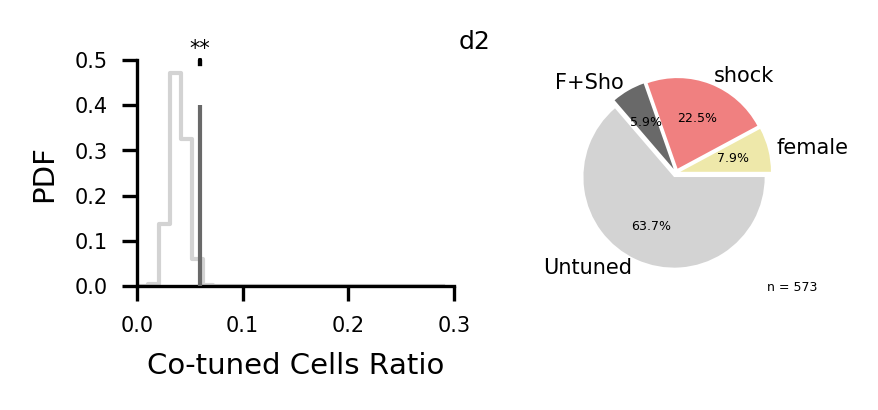

In [27]:
comparison = 'female_v_shock_d2'
try:
    pop1 = cells_d2_fem_v_SS
    pop2 = cells_d2_sho_v_odors
    unt = ~(cells_d2_fem_v_SS+cells_d2_sho_v_odors)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d2', labels=['female', 'shock', 'F+Sho', 'Untuned'],
                       colors=[f1,s1,'dimgrey',g],hist_colors=[g,'dimgrey'])
    
    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

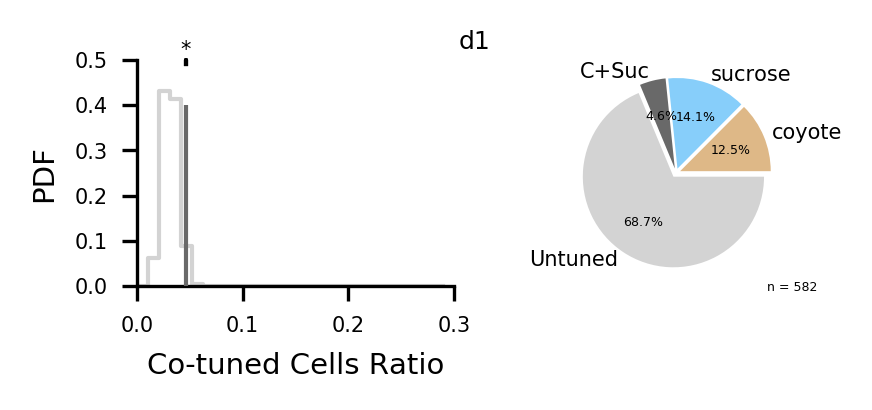

In [28]:
comparison = 'coyote_v_suc_d1'
try:
    pop1 = cells_d1_coyote_v_SS
    pop2 = cells_d1_rew_v_odors
    unt = ~(cells_d1_coyote_v_SS+cells_d1_rew_v_odors)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d1', labels=['coyote', 'sucrose', 'C+Suc', 'Untuned'],
                      colors=[c1,r1,'dimgrey',g],hist_colors=[g,'dimgrey'])
    
    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

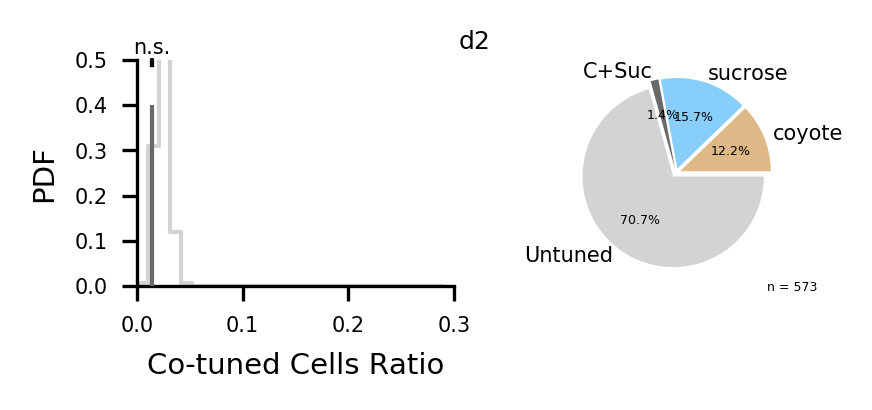

In [29]:
comparison = 'coyote_v_suc_d2'
try:
    pop1 = cells_d2_coyote_v_SS
    pop2 = cells_d2_rew_v_odors
    unt = ~(cells_d2_coyote_v_SS+cells_d2_rew_v_odors)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d2', labels=['coyote', 'sucrose', 'C+Suc', 'Untuned'],
                      colors=[c1,r1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

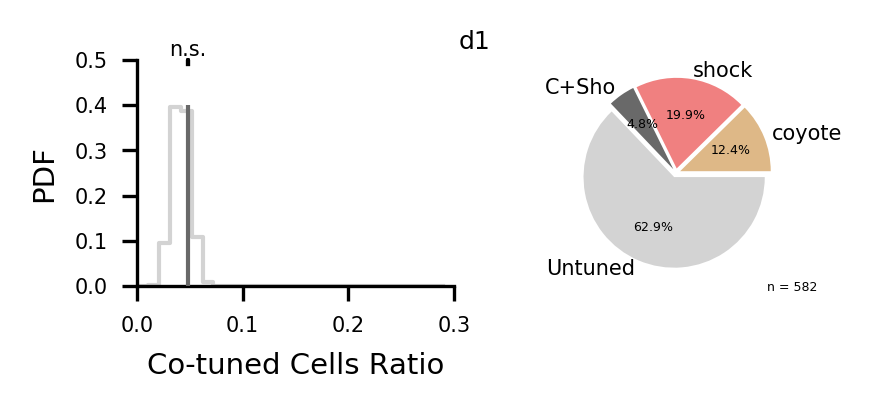

In [30]:
comparison = 'coyote_v_shock_d1'
try:
    pop1 = cells_d1_coyote_v_SS
    pop2 = cells_d1_sho_v_odors
    unt = ~(cells_d1_coyote_v_SS+cells_d1_sho_v_odors)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d1', labels=['coyote', 'shock', 'C+Sho', 'Untuned'],
                       colors=[c1,s1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

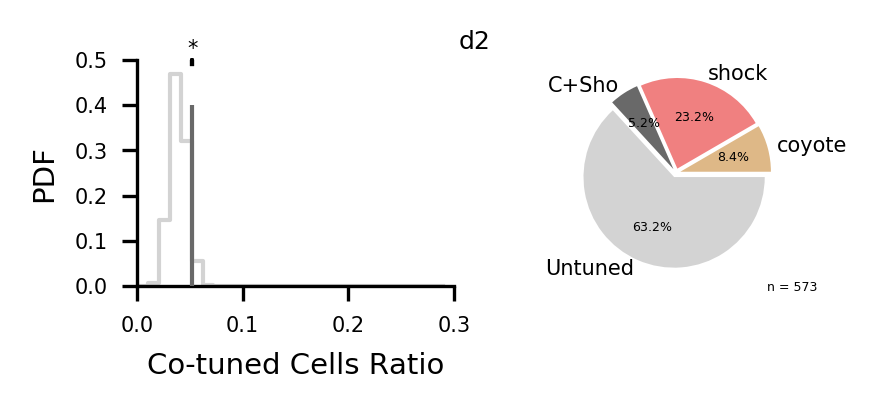

In [31]:
comparison = 'coyote_v_shock_d2'
try:
    pop1 = cells_d2_coyote_v_SS
    pop2 = cells_d2_sho_v_odors
    unt = ~(cells_d2_coyote_v_SS+cells_d2_sho_v_odors)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d2', labels=['coyote', 'shock', 'C+Sho', 'Untuned'],
                      colors=[c1,s1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

In [32]:
comparison = 'blast_v_suc_d1'
try:
    pop1 = cells_alld1_blasts
    pop2 = cells_alld1_rew
    unt = ~(cells_alld1_blasts+cells_alld1_rew)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d1', labels=['blast', 'sucrose', 'B+Suc', 'Untuned'],
                      colors=[b1,r1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'    

fail


In [33]:
comparison = 'blast_v_suc_d2'
try:
    pop1 = cells_alld2_blasts
    pop2 = cells_alld2_rew
    unt = ~(cells_alld2_blasts+cells_alld2_rew)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d2', labels=['blast', 'sucrose', 'B+Suc', 'Untuned'],
                      colors=[b1,r1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

fail


In [34]:
comparison = 'blast_v_shock_d1'
try:
    pop1 = cells_alld1_blasts
    pop2 = cells_alld1_sho
    unt = ~(cells_alld1_blasts+cells_alld1_sho)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d1', labels=['blast', 'shock', 'B+Sho', 'Untuned'],
                      colors=[b1,s1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

fail


In [35]:
comparison = 'blast_v_shock_d2'
try:
    pop1 = cells_alld2_blasts
    pop2 = cells_alld2_sho
    unt = ~(cells_alld2_blasts+cells_alld2_sho)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d2', labels=['blast', 'shock', 'B+Sho', 'Untuned'],
                      colors=[b1,s1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

fail


In [36]:
comparison = 'blast_v_female_d1'
try:
    pop1 = cells_alld1_blasts
    pop2 = cells_alld1_female
    unt = ~(cells_alld1_blasts+cells_alld1_female)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d1', labels=['blast', 'female', 'B+F', 'Untuned'],
                      colors=[b1,f1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

fail


In [37]:
comparison = 'blast_v_female_d2'
try:
    pop1 = cells_alld2_blasts
    pop2 = cells_alld2_female
    unt = ~(cells_alld2_blasts+cells_alld2_female)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d2', labels=['blast', 'female', 'B+F', 'Untuned'],
                      colors=[b1,f1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

fail


In [38]:
comparison = 'blast_v_coyote_d1'
try:
    pop1 = cells_alld1_blasts
    pop2 = cells_alld1_coyote
    unt = ~(cells_alld1_blasts+cells_alld1_coyote)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d1', labels=['blast', 'coyote', 'B+C', 'Untuned'],
                      colors=[b1,c1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

fail


In [47]:
comparison = 'blast_v_coyote_d2'
try:
    pop1 = cells_alld2_blasts
    pop2 = cells_alld2_coyote
    unt = ~(cells_alld2_blasts+cells_alld2_coyote)
    N = len(pop1)
    est = calc_shuffle_overlap(pop1, pop2, n_loops=n_loops,N=N)
    
    colors = [(0, 0.2, 1), (0.5, 0.2, 1), (0.8, 0.2, 1), (0.8, 0.8, 0.8)]
    fig, axs = plot_it(pop1, pop2, unt, est,
                       title='d2', labels=['blast', 'coyote', 'B+C', 'Untuned'],
                      colors=[b1,c1,'dimgrey',g],hist_colors=[g,'dimgrey'])

    diff_from_chance[comparison]=[np.mean(est),(pop1*pop2).mean(),((pop1*pop2).mean())-(np.mean(est)),
                              (((pop1*pop2).mean())-(np.mean(est)))/(np.mean(est))]
    #fig.savefig('../img/cotuned_%s.pdf' %(comparison))
except:
    print 'fail'

fail


In [40]:
diff_from_chance.iterkeys()

<dictionary-keyiterator at 0x7fa2280eb260>

In [41]:
sorted(diff_from_chance)

['_blasts_d1_v_d2',
 '_coyote_d1_v_d2',
 '_female_d1_v_d2',
 '_shock_d1_v_d2',
 '_suc_d1_v_d2',
 'coyote_v_female_d1',
 'coyote_v_female_d2',
 'coyote_v_shock_d1',
 'coyote_v_shock_d2',
 'coyote_v_suc_d1',
 'coyote_v_suc_d2',
 'female_V_shock_d1',
 'female_v_shock_d2',
 'female_v_suc_d1',
 'female_v_suc_d2',
 'suc_v_shock_d1',
 'suc_v_shock_d2']

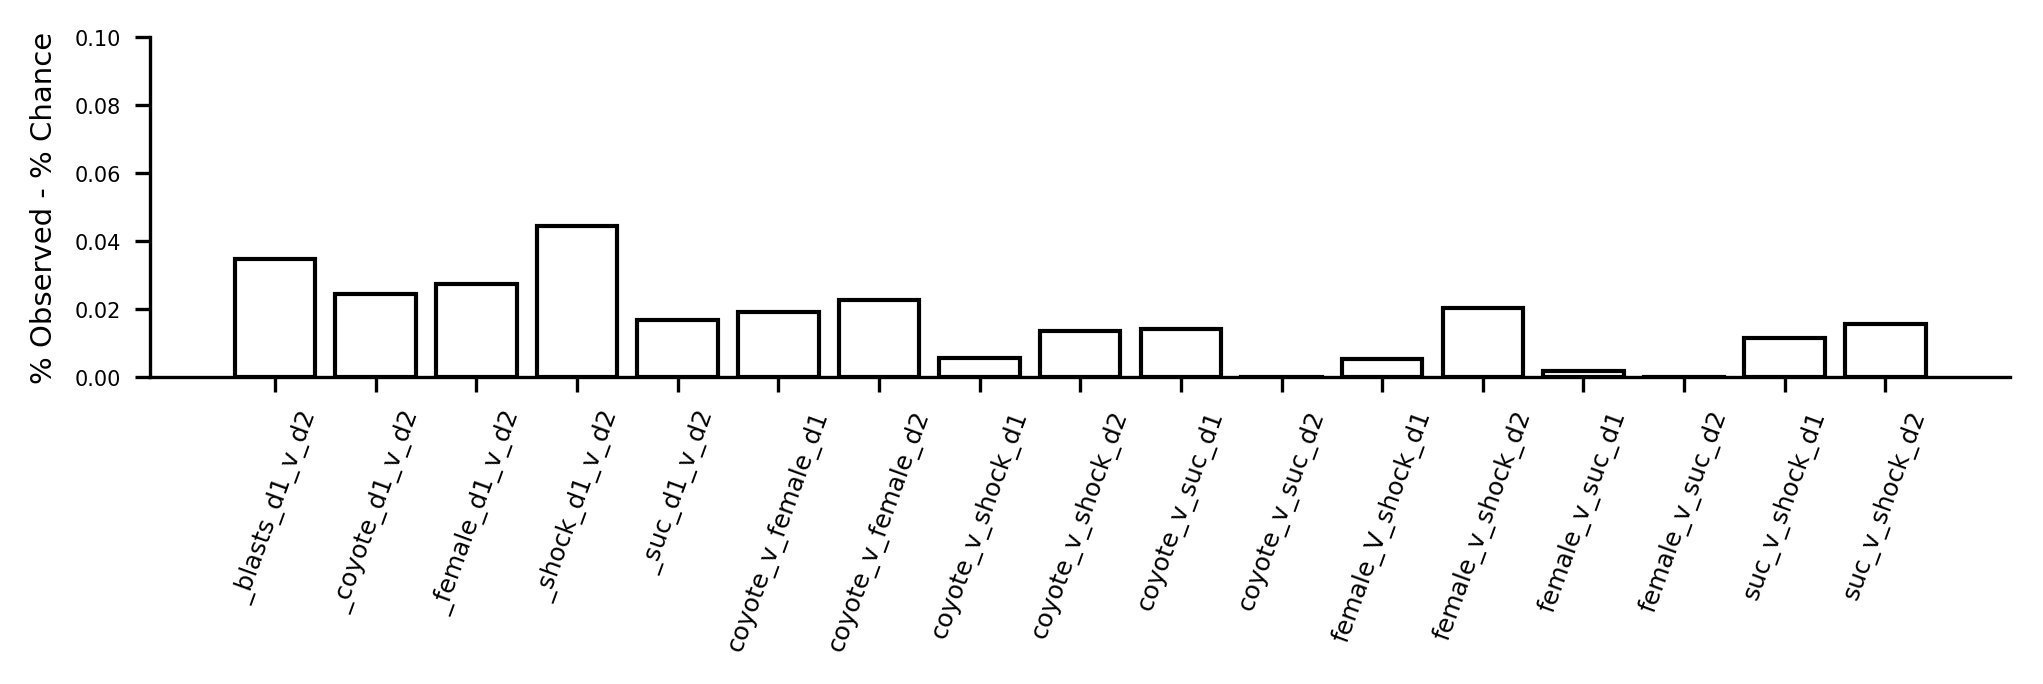

In [49]:
fig, ax = pl.subplots(1, 1, figsize=(8, 1.5))
values = [diff_from_chance[t][2] for t in sorted (diff_from_chance)]
#values = [t[2] for t in diff_from_chance]
pt.plot_bars(values, ax=ax)
ax.set_xticks(range(len(diff_from_chance)))
ax.set_xticklabels(sorted (diff_from_chance), rotation=70, fontsize=6)
pt.nicer_plot(ax)
ax.set_ylabel('% Observed - % Chance')
ax.set_ylim(0, 0.1)
fig.savefig('../img/vHPC_overlaps_ALL_comparisons.jpg')

In [43]:
save_workspace(db)

Could not store variable 'di'. Skipping...
Could not store variable 'IPython'. Skipping...
Could not store variable 'os'. Skipping...
Could not store variable 'pt'. Skipping...
Could not store variable 'sstats'. Skipping...
Could not store variable 'pl'. Skipping...
Could not store variable 'ut'. Skipping...
Could not store variable 'pickle'. Skipping...
Could not store variable 'ip'. Skipping...
Could not store variable 'np'. Skipping...
Could not store variable 'sys'. Skipping...
